<a href="https://colab.research.google.com/github/Devnaam/Agentic_day/blob/main/univariate_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rishikeshkonapure/home-loan-approval")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/home-loan-approval


In [4]:
import os

# Assuming the dataset was downloaded to this path
dataset_path = "/kaggle/input/home-loan-approval"

if os.path.exists(dataset_path):
    print("Files in the dataset:")
    for root, dirs, files in os.walk(dataset_path):
        for name in files:
            print(os.path.join(root, name))
else:
    print(f"Dataset path not found: {dataset_path}")

Files in the dataset:
/kaggle/input/home-loan-approval/loan_sanction_test.csv
/kaggle/input/home-loan-approval/loan_sanction_train.csv


# Task
Perform univariate analysis on the datasets in "loan_sanction_test.csv" and "loan_sanction_train.csv".

## Load data

### Subtask:
Load the two CSV files, `loan_sanction_test.csv` and `loan_sanction_train.csv`, into pandas DataFrames.


In [5]:
import pandas as pd

df_train = pd.read_csv('/kaggle/input/home-loan-approval/loan_sanction_train.csv')
df_test = pd.read_csv('/kaggle/input/home-loan-approval/loan_sanction_test.csv')

print("First few rows of df_train:")
display(df_train.head())

print("\nFirst few rows of df_test:")
display(df_test.head())

First few rows of df_train:


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y



First few rows of df_test:


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


Combining the two datasets


In [6]:
df_train['source'] = 'train'
df_test['source'] = 'test'

df_combined = pd.concat([df_train, df_test], ignore_index=True)

print("First few rows of df_combined:")
display(df_combined.head())

print("\nShape of df_combined:")
print(df_combined.shape)

First few rows of df_combined:


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,source
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,train
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,train
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,train
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,train
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,train



Shape of df_combined:
(981, 14)


## Perform univariate analysis

### Subtask:
Iterate through the columns of the combined DataFrame and perform univariate analysis based on the data type of each column (e.g., calculate descriptive statistics for numerical columns, count frequencies for categorical columns).


In [7]:
for column in df_combined.columns:
    print(f"\nAnalyzing column: {column}")
    if df_combined[column].dtype in ['int64', 'float64']:
        print("Descriptive Statistics:")
        display(df_combined[column].describe())
    else:
        print("Frequency Counts:")
        display(df_combined[column].value_counts())


Analyzing column: Loan_ID
Frequency Counts:


,count
Loan_ID,
LP002989,1
LP001002,1
LP001003,1
LP001005,1
LP001006,1
...,...
LP001020,1
LP001018,1
LP001014,1



Analyzing column: Gender
Frequency Counts:


,count
Gender,
Male,775
Female,182



Analyzing column: Married
Frequency Counts:


,count
Married,
Yes,631
No,347



Analyzing column: Dependents
Frequency Counts:


,count
Dependents,
0,545
1,160
2,160
3+,91



Analyzing column: Education
Frequency Counts:


,count
Education,
Graduate,763
Not Graduate,218



Analyzing column: Self_Employed
Frequency Counts:


,count
Self_Employed,
No,807
Yes,119



Analyzing column: ApplicantIncome
Descriptive Statistics:


,ApplicantIncome
count,981.000000
mean,5179.795107
std,5695.104533
min,0.000000
25%,2875.000000
50%,3800.000000
75%,5516.000000
max,81000.000000



Analyzing column: CoapplicantIncome
Descriptive Statistics:


,CoapplicantIncome
count,981.000000
mean,1601.916330
std,2718.772806
min,0.000000
25%,0.000000
50%,1110.000000
75%,2365.000000
max,41667.000000



Analyzing column: LoanAmount
Descriptive Statistics:


,LoanAmount
count,954.000000
mean,142.511530
std,77.421743
min,9.000000
25%,100.000000
50%,126.000000
75%,162.000000
max,700.000000



Analyzing column: Loan_Amount_Term
Descriptive Statistics:


,Loan_Amount_Term
count,961.000000
mean,342.201873
std,65.100602
min,6.000000
25%,360.000000
50%,360.000000
75%,360.000000
max,480.000000



Analyzing column: Credit_History
Descriptive Statistics:


,Credit_History
count,902.000000
mean,0.835920
std,0.370553
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000



Analyzing column: Property_Area
Frequency Counts:


,count
Property_Area,
Semiurban,349
Urban,342
Rural,290



Analyzing column: Loan_Status
Frequency Counts:


,count
Loan_Status,
Y,422
N,192



Analyzing column: source
Frequency Counts:


,count
source,
train,614
test,367


## Visualize data

### Subtask:
Generate visualizations for each column to understand their distributions (e.g., histograms for numerical data, bar plots for categorical data).


Generating plot for column: Gender


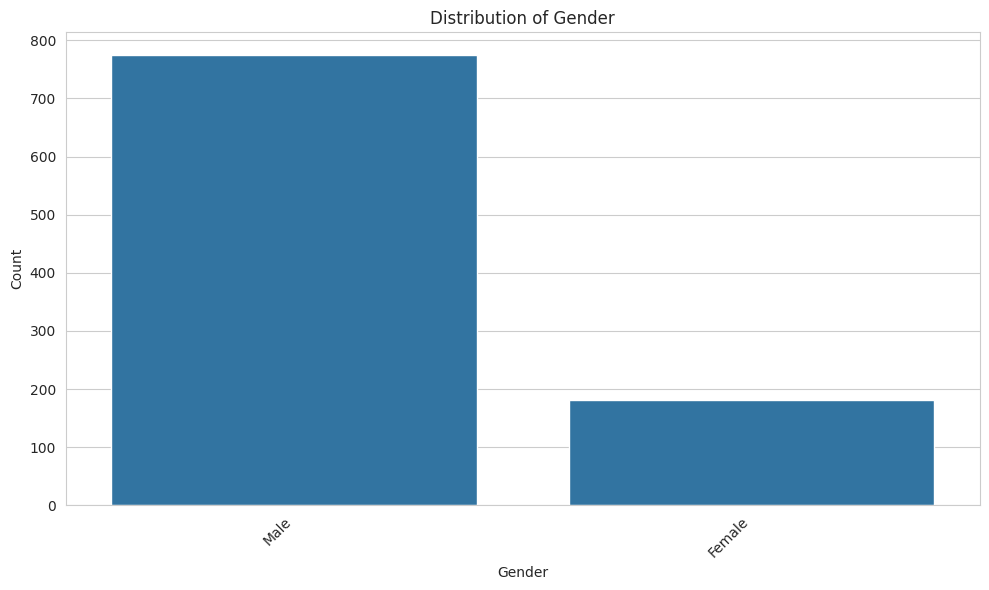

Generating plot for column: Married


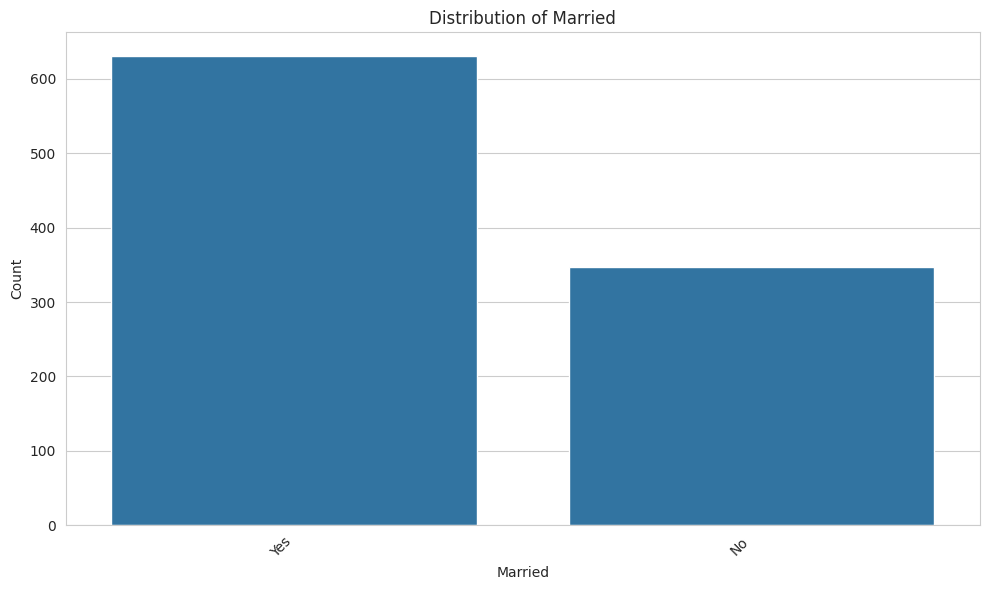

Generating plot for column: Dependents


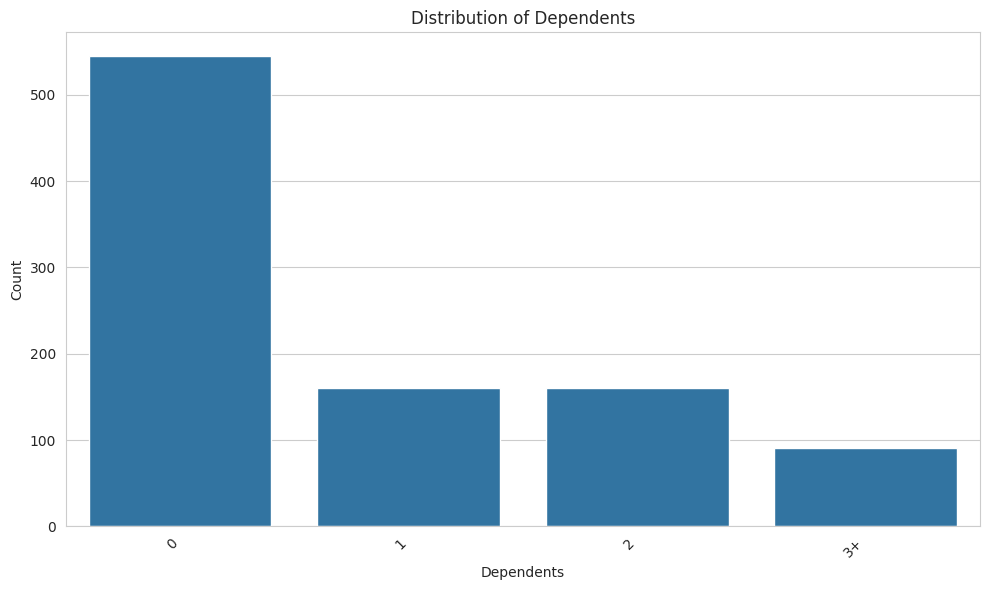

Generating plot for column: Education


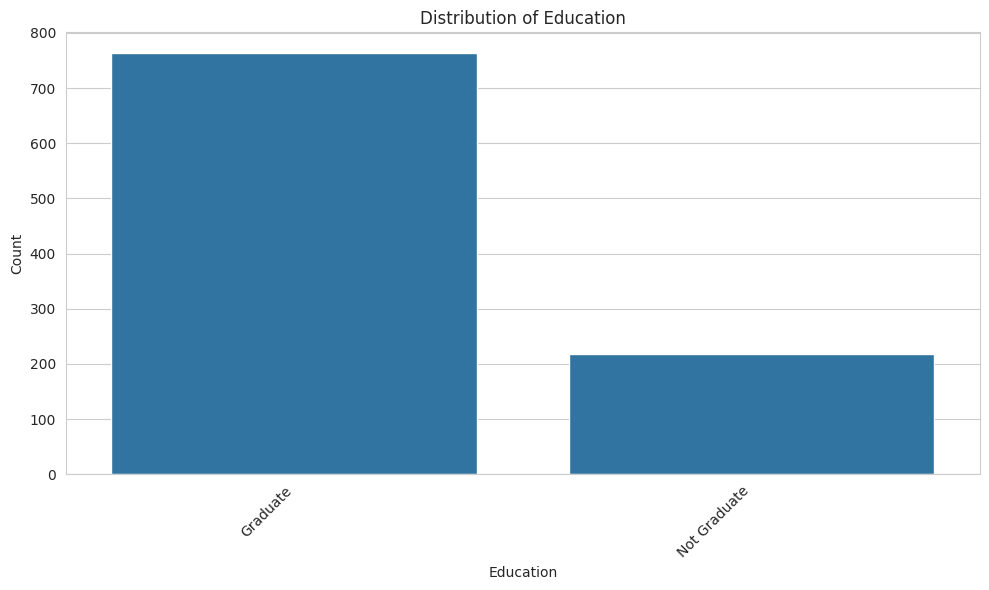

Generating plot for column: Self_Employed


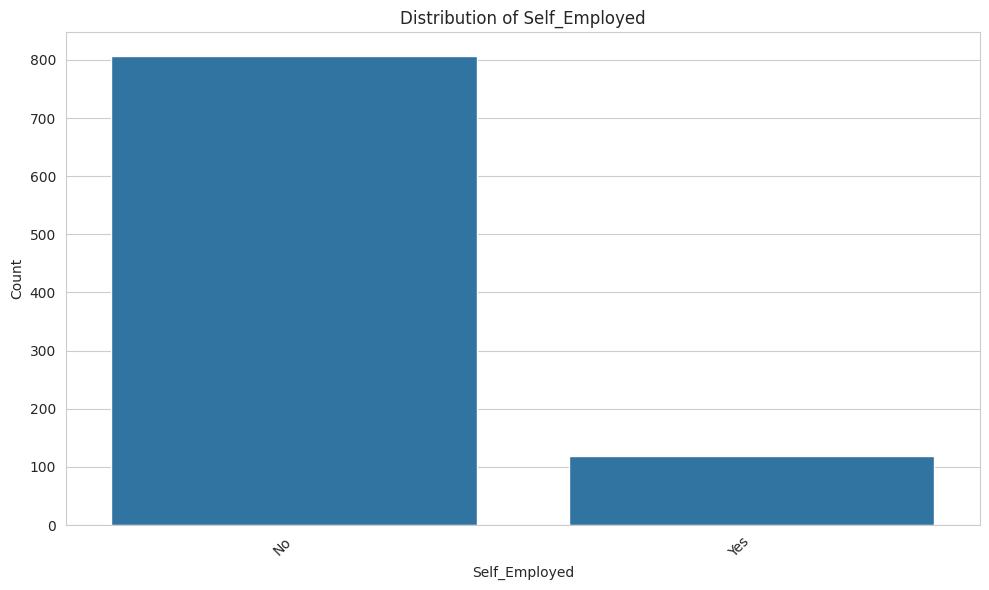

Generating plot for column: ApplicantIncome


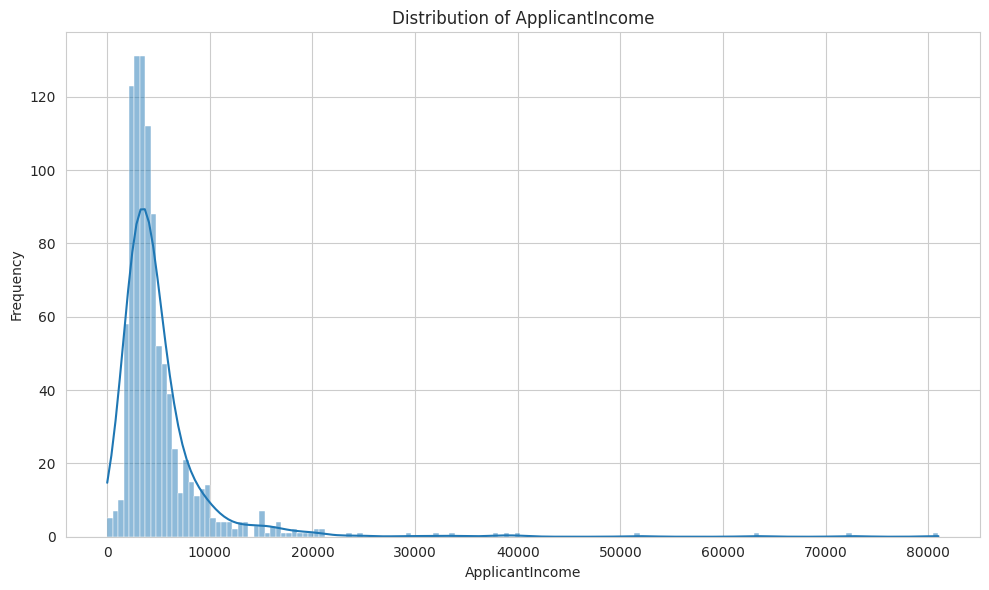

Generating plot for column: CoapplicantIncome


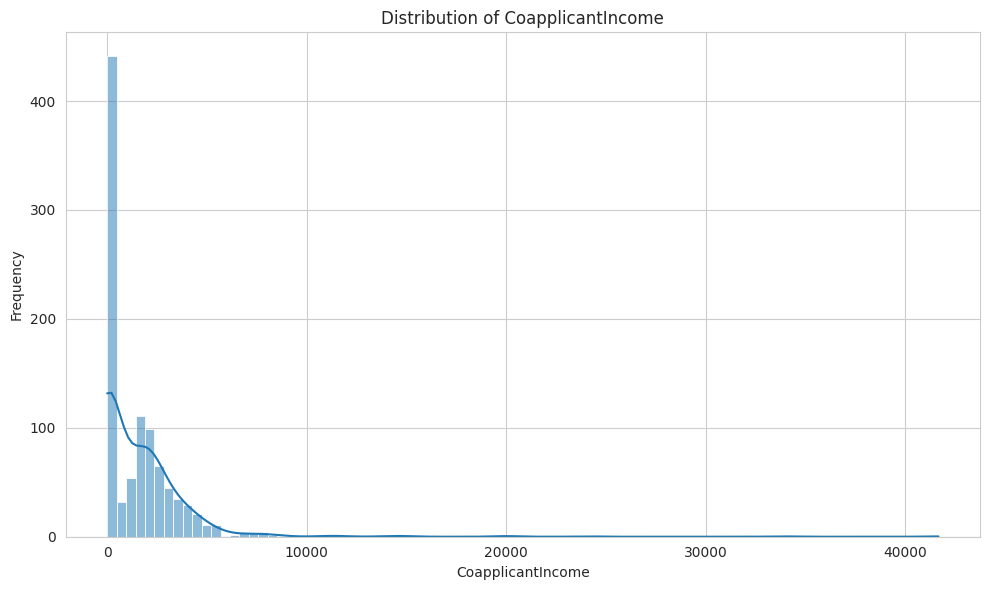

Generating plot for column: LoanAmount


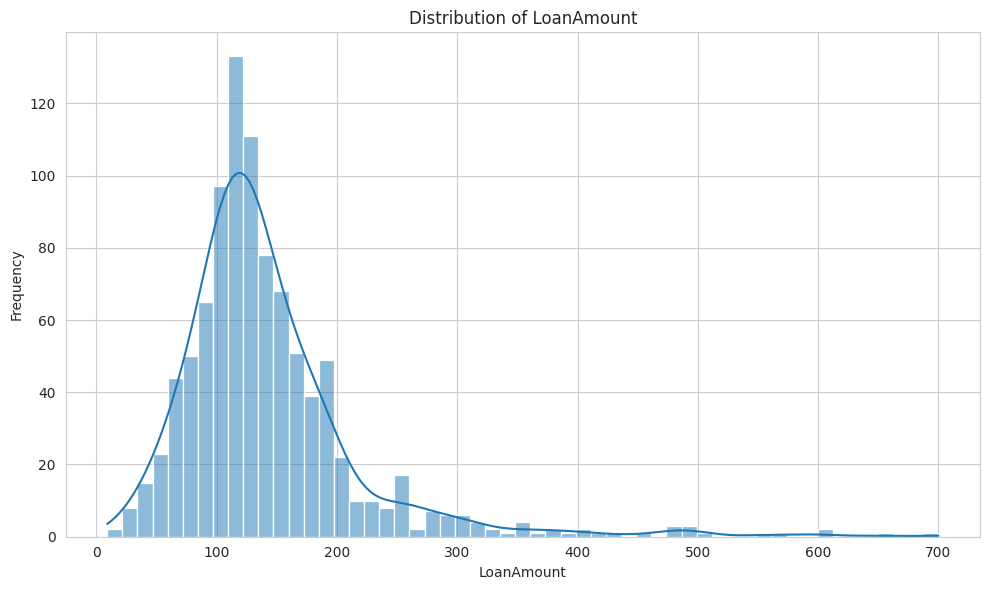

Generating plot for column: Loan_Amount_Term


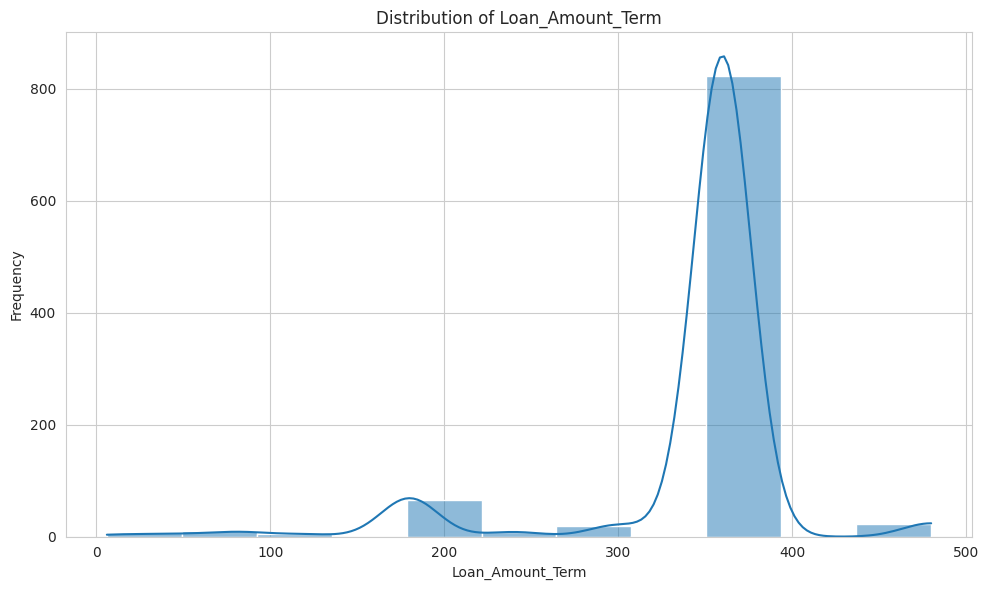

Generating plot for column: Credit_History


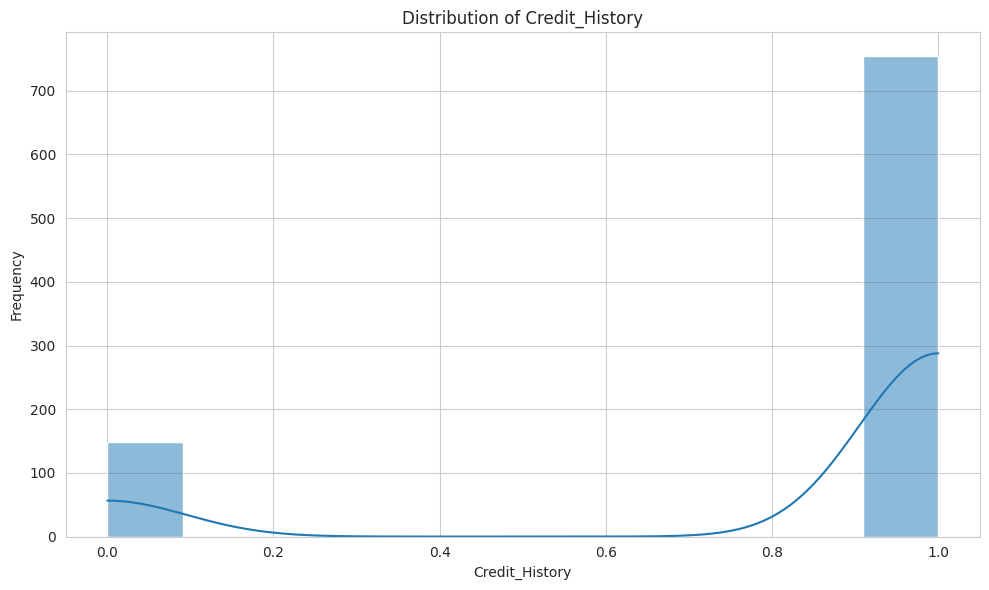

Generating plot for column: Property_Area


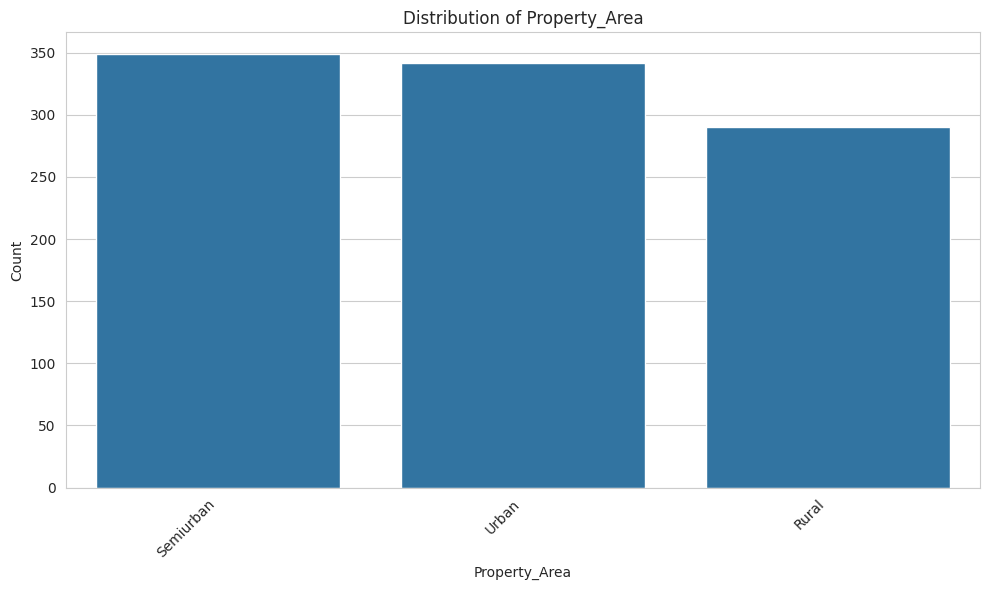

Generating plot for column: Loan_Status


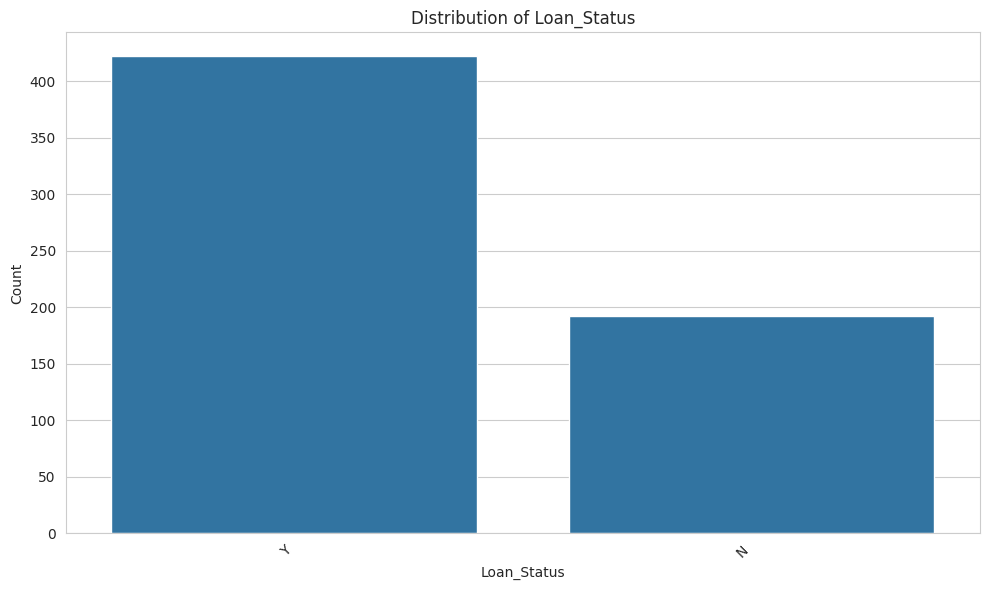

Generating plot for column: source


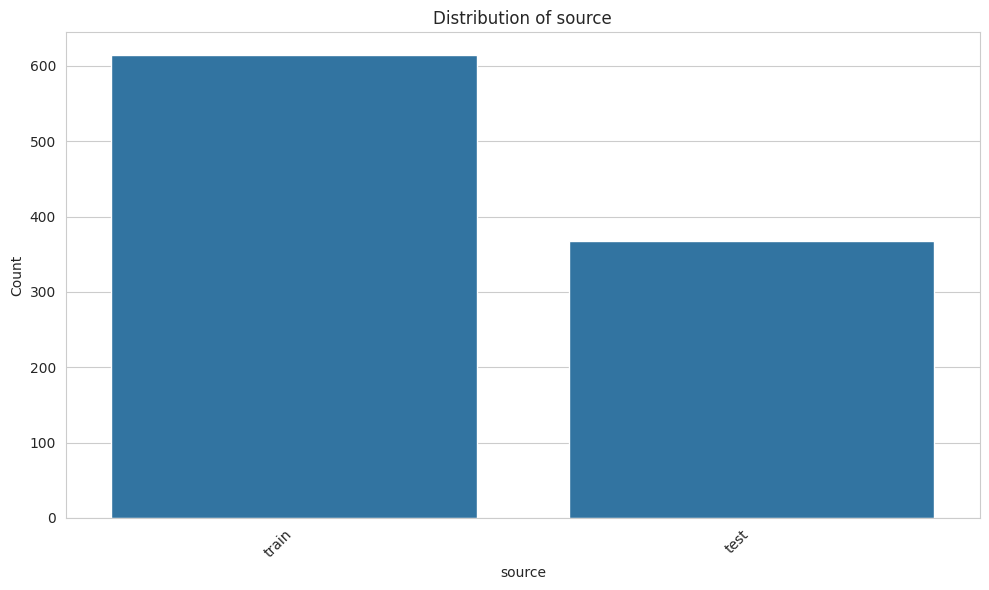

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Define the list of columns to analyze, excluding 'Loan_ID' as it's an identifier
columns_to_analyze = [col for col in df_combined.columns if col != 'Loan_ID']

for column in columns_to_analyze:
    print(f"Generating plot for column: {column}")
    plt.figure(figsize=(10, 6)) # Adjust figure size for better readability

    if df_combined[column].dtype in ['int64', 'float64']:
        # Numerical column: Plot histogram
        sns.histplot(data=df_combined, x=column, kde=True)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
    else:
        # Categorical column: Plot bar plot of value counts
        # Calculate value counts and handle potential missing values
        value_counts = df_combined[column].value_counts(dropna=False)
        sns.barplot(x=value_counts.index, y=value_counts.values)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right') # Rotate labels for better readability if many categories

    plt.tight_layout() # Adjust layout to prevent labels overlapping
    plt.show()

## Summarize findings

### Subtask:
Present a summary of the univariate analysis, highlighting key characteristics and insights from each feature.


**Reasoning**:
Summarize the univariate analysis findings for each column based on the descriptive statistics, frequency counts, and visualizations from previous steps.



In [9]:
print("Summary of Univariate Analysis:")

print("\nLoan_ID:")
print("- Unique identifier, no analysis needed beyond confirming uniqueness (already done implicitly by combining).")

print("\nGender:")
print("- Mostly Male applicants.")
print("- Contains missing values.")

print("\nMarried:")
print("- More married applicants than not married.")
print("- Contains missing values.")

print("\nDependents:")
print("- Most applicants have 0 dependents, followed by 1, 2, and then 3+.")
print("- The '3+' category groups multiple values.")
print("- Contains missing values.")

print("\nEducation:")
print("- Majority of applicants are Graduates.")

print("\nSelf_Employed:")
print("- Most applicants are not self-employed.")
print("- Contains missing values.")

print("\nApplicantIncome:")
print("- Right-skewed distribution, indicating a few applicants have significantly higher incomes.")
print("- Wide range of incomes.")

print("\nCoapplicantIncome:")
print("- Heavily skewed towards 0, meaning many applicants have no co-applicant income.")
print("- Some applicants have substantial co-applicant income.")

print("\nLoanAmount:")
print("- Right-skewed distribution, similar to ApplicantIncome.")
print("- Contains missing values.")

print("\nLoan_Amount_Term:")
print("- The most frequent term is 360 months (30 years).")
print("- Other terms are present but less frequent.")
print("- Contains missing values.")

print("\nCredit_History:")
print("- Binary variable (0 or 1), indicating whether credit history meets guidelines.")
print("- Majority of applicants have a credit history of 1.")
print("- Contains missing values.")

print("\nProperty_Area:")
print("- Distribution is relatively even across Semiurban, Urban, and Rural areas, with Semiurban being the most frequent.")

print("\nLoan_Status:")
print("- Target variable for the training data (NaN for test data).")
print("- More loans were approved ('Y') than rejected ('N') in the training set.")

print("\nsource:")
print("- Indicates the origin of the data (train or test).")
print("- More samples from the training set than the test set.")

Summary of Univariate Analysis:

Loan_ID:
- Unique identifier, no analysis needed beyond confirming uniqueness (already done implicitly by combining).

Gender:
- Mostly Male applicants.
- Contains missing values.

Married:
- More married applicants than not married.
- Contains missing values.

Dependents:
- Most applicants have 0 dependents, followed by 1, 2, and then 3+.
- The '3+' category groups multiple values.
- Contains missing values.

Education:
- Majority of applicants are Graduates.

Self_Employed:
- Most applicants are not self-employed.
- Contains missing values.

ApplicantIncome:
- Right-skewed distribution, indicating a few applicants have significantly higher incomes.
- Wide range of incomes.

CoapplicantIncome:
- Heavily skewed towards 0, meaning many applicants have no co-applicant income.
- Some applicants have substantial co-applicant income.

LoanAmount:
- Right-skewed distribution, similar to ApplicantIncome.
- Contains missing values.

Loan_Amount_Term:
- The most

## Summary:

### Data Analysis Key Findings

*   **Missing Values:** Several columns contain missing values, including `Gender`, `Married`, `Dependents`, `Self_Employed`, `LoanAmount`, `Loan_Amount_Term`, and `Credit_History`.
*   **Dominant Categories:**
    *   The majority of applicants are Male and Not Self-Employed.
    *   Most applicants have 0 dependents.
    *   The majority of applicants are Graduates.
    *   The most frequent loan term is 360 months.
    *   A significant majority of applicants have a credit history value of 1.
*   **Distribution Shapes:**
    *   `ApplicantIncome` and `LoanAmount` show right-skewed distributions, suggesting the presence of high values or outliers.
    *   `CoapplicantIncome` is heavily skewed towards zero.
*   **Categorical Distribution:** `Property_Area` has a relatively even distribution across Semiurban, Urban, and Rural areas.
*   **Target Variable:** In the training data, there are more approved loans ('Y') than rejected loans ('N').

### Insights or Next Steps

*   Addressing missing values in the identified columns is crucial before modeling.
*   Feature transformation (e.g., log transformation) might be beneficial for skewed numerical features like `ApplicantIncome`, `CoapplicantIncome`, and `LoanAmount` to normalize their distributions.
